<a href="https://colab.research.google.com/github/wilky8333/Chaos_prediction_neural_network/blob/main/chaos_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import os


In [ ]:
# Collab to access drive acc
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = r'/content/drive/MyDrive/Chaos_Bpnn/Sorted_Exchange_Rates_CNY_to_IDR.xlsx'
data = pd.read_excel(file_path)
print(data.head(1475))

        NO  Value     Sell      Buy       Date
0     1474      1  2122.75  2101.72 2019-01-02
1     1473      1  2119.45  2098.47 2019-01-03
2     1472      1  2102.76  2081.77 2019-01-04
3     1471      1  2068.98  2048.25 2019-01-07
4     1470      1  2061.49  2041.02 2019-01-08
...    ...    ...      ...      ...        ...
1469     5      1  2240.40  2218.05 2024-12-23
1470     4      1  2224.87  2202.67 2024-12-24
1471     3      1  2231.74  2209.51 2024-12-27
1472     2      1  2237.54  2215.25 2024-12-30
1473     1      1  2225.26  2203.08 2024-12-31

[1474 rows x 5 columns]


In [ ]:
df_selected_ = data[['Date', 'Sell']]
# Display the selected data
print(df_selected_.head(1475))

           Date     Sell
0    2019-01-02  2122.75
1    2019-01-03  2119.45
2    2019-01-04  2102.76
3    2019-01-07  2068.98
4    2019-01-08  2061.49
...         ...      ...
1469 2024-12-23  2240.40
1470 2024-12-24  2224.87
1471 2024-12-27  2231.74
1472 2024-12-30  2237.54
1473 2024-12-31  2225.26

[1474 rows x 2 columns]


In [ ]:
df_selected_ = df_selected_.copy()

# Normalisasi kolom 'buy'
df_selected_['Sell'] = (df_selected_['Sell'] - df_selected_['Sell'].min()) / (df_selected_['Sell'].max() - df_selected_['Sell'].min())

print(df_selected_.head(1475))

           Date      Sell
0    2019-01-02  0.394741
1    2019-01-03  0.386523
2    2019-01-04  0.344962
3    2019-01-07  0.260845
4    2019-01-08  0.242193
...         ...       ...
1469 2024-12-23  0.687709
1470 2024-12-24  0.649036
1471 2024-12-27  0.666144
1472 2024-12-30  0.680587
1473 2024-12-31  0.650007

[1474 rows x 2 columns]


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 - 1s - 45ms/step - loss: 0.0450 - val_loss: 0.0135
Epoch 2/100
33/33 - 0s - 6ms/step - loss: 0.0241 - val_loss: 0.0073
Epoch 3/100
33/33 - 0s - 6ms/step - loss: 0.0178 - val_loss: 0.0072
Epoch 4/100
33/33 - 0s - 8ms/step - loss: 0.0138 - val_loss: 0.0039
Epoch 5/100
33/33 - 0s - 5ms/step - loss: 0.0102 - val_loss: 0.0025
Epoch 6/100
33/33 - 0s - 5ms/step - loss: 0.0079 - val_loss: 0.0011
Epoch 7/100
33/33 - 0s - 9ms/step - loss: 0.0061 - val_loss: 0.0022
Epoch 8/100
33/33 - 0s - 10ms/step - loss: 0.0049 - val_loss: 8.8940e-04
Epoch 9/100
33/33 - 0s - 8ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 10/100
33/33 - 0s - 10ms/step - loss: 0.0035 - val_loss: 0.0012
Epoch 11/100
33/33 - 0s - 7ms/step - loss: 0.0036 - val_loss: 7.8979e-04
Epoch 12/100
33/33 - 0s - 9ms/step - loss: 0.0033 - val_loss: 8.2172e-04
Epoch 13/100
33/33 - 0s - 9ms/step - loss: 0.0033 - val_loss: 7.0200e-04
Epoch 14/100
33/33 - 0s - 10ms/step - loss: 0.0030 - val_loss: 8.2831e-04
Epoch 15/100
33/33 - 0s - 9ms/s

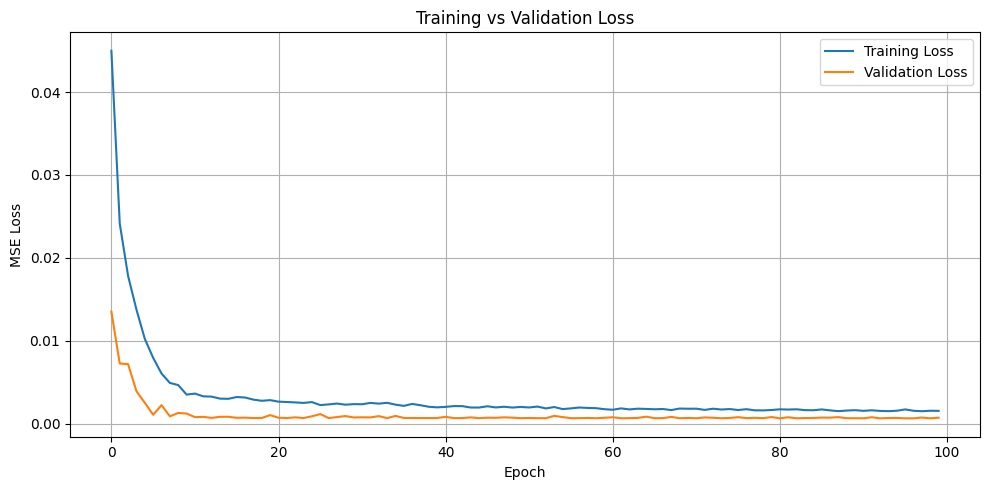

Current CPU Usage: 15.9%


In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.optimizers import SGD
import tensorflow as tf


def get_cpu_usage():
    usage_percent = psutil.cpu_percent()
    print(f"Current CPU Usage: {usage_percent}%")

s = time.process_time()#start time
# --- Ambil data dan buat window ---
values = df_selected_['Sell'].values
window_size = 3

def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Buat dataset utama dari seluruh data
X_all, y_all = create_dataset(values, window_size)

# Bagi data menjadi train, test, dan val (tanpa shuffle karena time series)
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.7, shuffle=False, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, shuffle=False, random_state=0)

# reshape input menjadi [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


# --- Build LSTM Model ---
model = Sequential()
model.add(LSTM(50, input_shape=(1, window_size),
               kernel_initializer="glorot_uniform",
               bias_initializer="zeros"))
model.add(Dropout(0.2))
model.add(Dense(1))
# Compile dan train model
opt = SGD(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt)

history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_val, y_val),
                    verbose=2)

e = time.process_time()#end time\
print(f"{e - s} seconds")



# --- Plot Loss ---
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

get_cpu_usage()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Test Loss: 0.00046


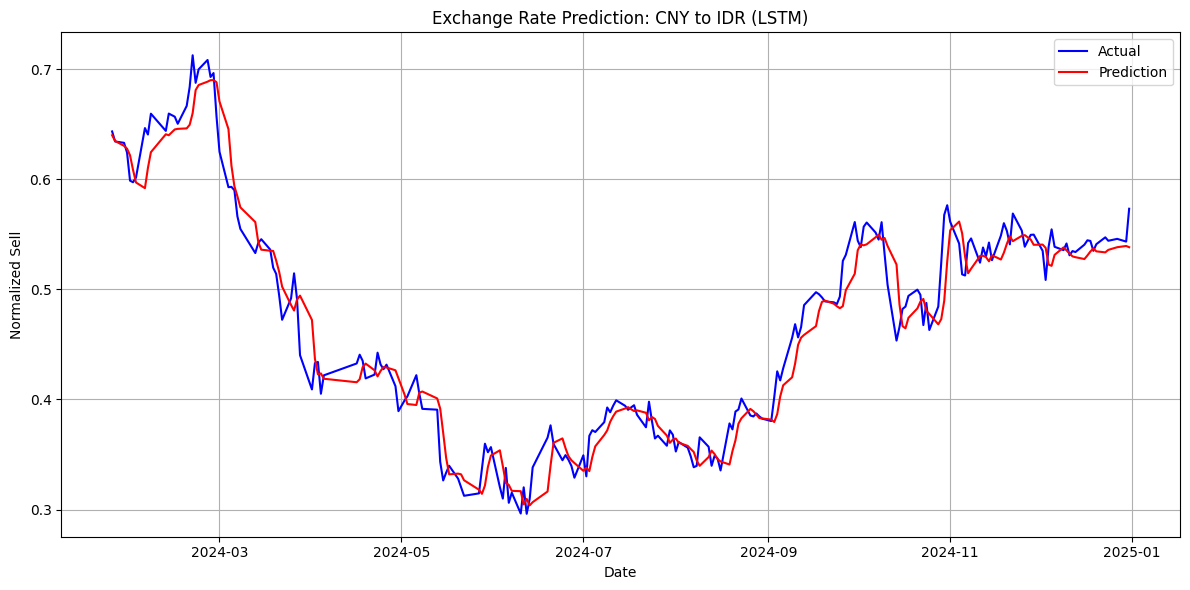

In [ ]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung loss
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.5f}")

# Ambil tanggal sesuai panjang data test
date_test = df_selected_['Date'][-len(y_test):].reset_index(drop=True)

# Konversi y_pred ke 1D array agar bisa diplot
y_pred = y_pred.flatten()

plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test, label="Actual", color="blue")
plt.plot(date_test, y_pred, label="Prediction", color="red")
plt.xlabel("Date")
plt.ylabel("Normalized Sell")
plt.title("Exchange Rate Prediction: CNY to IDR (LSTM)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
